## A Friendly Introduction to Data Science and Machine Learning
#### In this notebook we will estimate the value of Absolute Zero (the coldest temperature in the universe) using an oversimplified linear regression analysis

#### Our data consists of readings of Temperature vs Pressure. To estimate the Absolute Zero we just need to find which temperature would have a pressure of zero, since there's no such things as negative pressure.

#### You will see that even with a very small sample our predition won't be too far from the actual value

#### Let's start!

In [1]:
# Importing Libraries
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

We will get our data directly from the website carolina.com
You can use the url bellow to check out the experiment

In [2]:
study_tables = pd.read_html('https://www.carolina.com/teacher-resources/Interactive/gay-lussacs-law-temperature-pressure-relationship-in-gases-determination-absolute-zero/tr10730.tr')
# df stands for data frame
df = study_tables[2]
df

,0,1,2,3,4
0,Reading No.,Type of Bath Used,Temperature (°C),Temperature (°K),Pressure (mm Hg)
1,1,Boiling water,100.0,373.1,945
2,2,Boiling water + room temp. water,53.0,326.1,840
3,3,Room temp. water,21.0,294.1,765
4,4,Ice water,0.0,273.1,720
5,5,Dry ice/ethanol (or acetone),–78.5,NaN,NaN
6,6,Liquid nitrogen,–195.7,77.4,225


There's more information in the data frame than we actually need. Let's get rid of reading no., type of bath used and temperature in kelvin.

In [3]:
df.columns = df.iloc[0]
df.drop(0, inplace=True)
df = df[['Temperature  (°C)', 'Pressure (mm Hg)']]
df.columns = ['Temp', 'Pressure']
df

,Temp,Pressure
1,100.0,945
2,53.0,840
3,21.0,765
4,0.0,720
5,–78.5,NaN
6,–195.7,225


In order to plot the values in a graph, the values need to be either integer or floats, but our table has the values as strings. Let's change that.

In [4]:
df.dtypes

Temp        object
Pressure    object
dtype: object

In [5]:
df = df.replace('–','-',   regex=True).apply(pd.to_numeric)
df.dtypes

Temp        float64
Pressure    float64
dtype: object

(0, 1100)

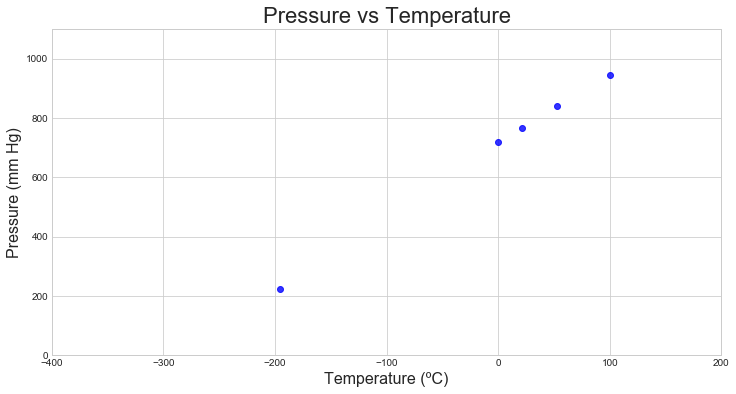

In [6]:
fig = plt.figure(figsize=(12,6))

sns.regplot('Temp', 'Pressure', df, color='b', fit_reg=False)

plt.xlabel('Temperature (ºC)', fontsize=16)
plt.ylabel('Pressure (mm Hg)', fontsize=16)
plt.title('Pressure vs Temperature', fontsize=22)

pylab.xlim([-400, 200])
pylab.ylim([0, 1100])

Notice that we have 6 rows of data, but only 5 points plotted. That's because entry 5 was missing the pressure. Looking at the graph above we can roughly estimate the missing value and plot it again. What value would you chose? How did you chose it?

In [7]:
df['Pressure'][5] = 500
df

,Temp,Pressure
1,100.0,945.0
2,53.0,840.0
3,21.0,765.0
4,0.0,720.0
5,-78.5,500.0
6,-195.7,225.0


(0, 1100)

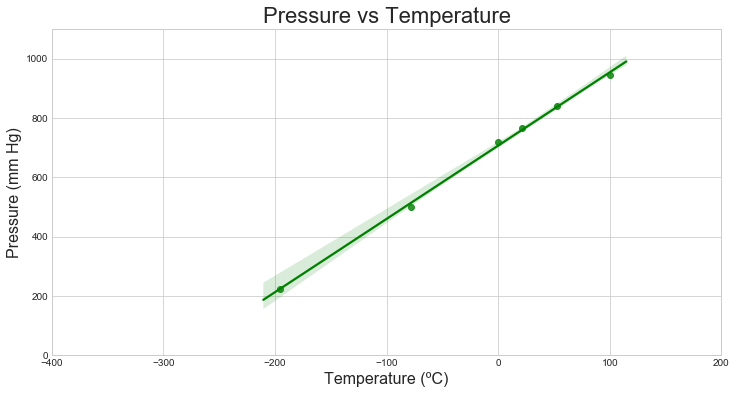

In [8]:
fig = plt.figure(figsize=(12,6))

sns.regplot('Temp', 'Pressure', df, color='g')

plt.xlabel('Temperature (ºC)', fontsize=16)
plt.ylabel('Pressure (mm Hg)', fontsize=16)
plt.title('Pressure vs Temperature', fontsize=22)

pylab.xlim([-400, 200])
pylab.ylim([0, 1100])

Notice how our estimative wasn't that far off. We chose a value close to 500 becaue we imagined a line in our heads based on the points in the graph. Now we can see that same line in the computer's eyes.

Now to create our machine learning model based on linear regression we will import the LinearRegression from the Scikit-Learn library and define our X (Pressure) and y (Temperature) parameters for the function y = f(X)

We are calling X = Pressure, because we already have the value of Pressure that we want (0) to find the Absolute Zero.

In [9]:
from sklearn.linear_model import LinearRegression

X = df['Pressure'][:, None]
y = df['Temp'][:, None]

lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

With our model trained with the available data we can predict the temperature for the case where pressure is equal to zero.

In [10]:
lm.predict(0)

array([[-285.69508075]])

### Here it is! According to our model Absolute Zero is -285ºC, which is pretty close to the actual value of -273ºC.

### Keep in mind that we used very rudimentary methods for this notebook and normally we would have a much larger dataset to work with.

### I hope you enjoyed!